### Normalization in Data Preprocessing 🇵🇰

Yaar, normalization aik zabardast technique hai jo data preprocessing mein use hoti hai. Iska kaam hai data ko scale karna taake saari values ek jaisi range mein aa jaayein. Yeh machine learning models ki performance improve kar deta hai, especially un models ke liye jo distance calculations (jaise KNN) ya gradient-based algorithms (jaise logistic regression) pe depend karte hain. 📊

Seedhi baat yeh hai ke normalization ensure karta hai ke koi feature doosre feature ko dominate na kare sirf isliye ke uska scale bara hai. For example, agar ek feature ka range 0-1000 hai aur doosre ka 0-1, toh bara range wala feature chhote wale ko overshadow kar dega. Normalization yeh imbalance fix karta hai. ⚖️

#### Example:
Socho tum Pakistani players ke cricket stats 🏏 analyze kar rahe ho:
- **Feature 1**: Runs scored (e.g., 0-10,000)
- **Feature 2**: Batting average (e.g., 0-100)

Agar normalization na ho, toh "Runs scored" feature dominate karega kyunke iska range bara hai. Lekin normalization ke baad dono features ka range 0 aur 1 ke darmiyan hoga, aur dono equally important ban jaayenge.

#### Common Normalization Techniques:
- **Min-Max Scaling**: Data ko ek fixed range mein scale karta hai, usually [0, 1].
    
- **Z-Score Normalization**: Data ko mean aur standard deviation ke basis pe scale karta hai.  
      
#### Benefits of Normalization:
- 🚀 Machine learning models mein faster convergence.
- 📈 Accuracy improve hoti hai kyunke saare features ko barabar treat karta hai.
- 🛠️ Large-scale features ki wajah se hone wala bias reduce karta hai.


### L1 aur L2 Normalization ka Tafreeqi Jaiza 🇵🇰

Machine learning aur data preprocessing mein, L1 aur L2 normalization do mukhtalif techniques hain jo data ko scale karne ke liye use hoti hain. Dono ka maqsad hai features ko normalize karna taake model ki performance improve ho. Aayiye inka tafreeqi jaiza karte hain:

#### L1 Normalization (Manhattan Distance)
- L1 normalization mein har feature ki absolute values ka sum calculate kiya jata hai, aur phir har value ko us sum se divide kar diya jata hai.
- Iska formula hota hai:  
    **xi' = xi / Σ|xi|**  
    Jahan xi ek feature ki value hai aur Σ|xi| un sab values ka absolute sum hai.
- Yeh technique sparse data ke liye achi hoti hai, jahan zyada features ki values zero hoti hain.

**Example:**  
Socho tumhare paas ek feature vector hai: [2, -1, 3].  
L1 normalization ke baad yeh banega: [2/6, -1/6, 3/6] = [0.33, -0.17, 0.5].

#### L2 Normalization (Euclidean Distance)
- L2 normalization mein har feature ki values ka square sum calculate kiya jata hai, phir uska square root liya jata hai, aur phir har value ko us sum se divide kar diya jata hai.
- Iska formula hota hai:  
    **xi' = xi / √Σ(xi²)**  
    Jahan xi ek feature ki value hai aur √Σ(xi²) un sab values ka square root sum hai.
- Yeh technique un scenarios ke liye useful hai jahan magnitude zyada important ho.

**Example:**  
Socho tumhare paas ek feature vector hai: [2, -1, 3].  
L2 normalization ke baad yeh banega: [2/√14, -1/√14, 3/√14] ≈ [0.53, -0.27, 0.8].

#### Tafreeq:
- **L1**: Absolute values ka sum use karta hai, sparse data ke liye behtareen.  
- **L2**: Squared values ka sum use karta hai, magnitude ko emphasize karta hai.  

#### Kab Kya Use Karein?
- Agar tumhare data mein sparsity zyada hai (zyada zero values hain), toh **L1 normalization** use karo.  
- Agar tumhe magnitude aur distance zyada important lagti hai, toh **L2 normalization** behtar hai.  

Yeh dono techniques data ko ek standard scale pe le aati hain, jo machine learning models ki convergence aur accuracy improve karti hain. 🚀

In [42]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize         
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
# read the data
df = pd.read_csv('../data_scraping/datasets/Titanic.csv')  

# drop the columns that are not needed
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Sex','Embarked','Survived', 'Pclass', 'SibSp',
         'Parch'], axis=1, inplace=True)

# drop the rows with missing values
df['Age'] = df['Age'].fillna(df['Age'].mean())

boxcox = PowerTransformer(method='box-cox')
yeo_jonson = PowerTransformer(method='yeo-johnson')
quantile = QuantileTransformer(output_distribution='normal')

df["boxcox_age"] = boxcox.fit_transform(df[['Age']])
df["yeo_jonson_age"] = yeo_jonson.fit_transform(df[['Age']])
df["quantile_age"] = quantile.fit_transform(df[['Age']])

df["boxcox_fare"] = boxcox.fit_transform(df[['Fare']] +1) # Adding 1 to avoid negative values for Box-Cox
df["yeo_jonson_fare"] = yeo_jonson.fit_transform(df[['Fare']])
df["quantile_fare"] = quantile.fit_transform(df[['Fare']])


c:\Users\touse\miniconda3\envs\data_analysis\lib\site-packages\sklearn\preprocessing\_data.py:2785: UserWarning: n_quantiles (1000) is greater than the total number of samples (891). n_quantiles is set to n_samples.
  warnings.warn(
c:\Users\touse\miniconda3\envs\data_analysis\lib\site-packages\sklearn\preprocessing\_data.py:2785: UserWarning: n_quantiles (1000) is greater than the total number of samples (891). n_quantiles is set to n_samples.
  warnings.warn(


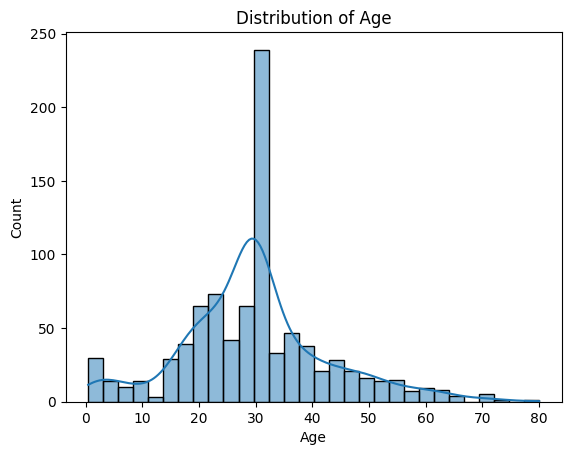

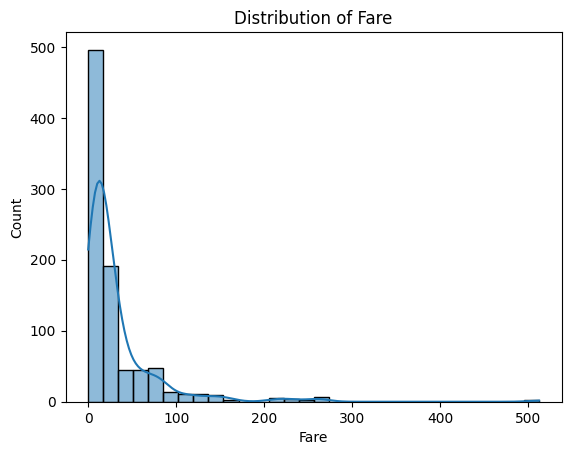

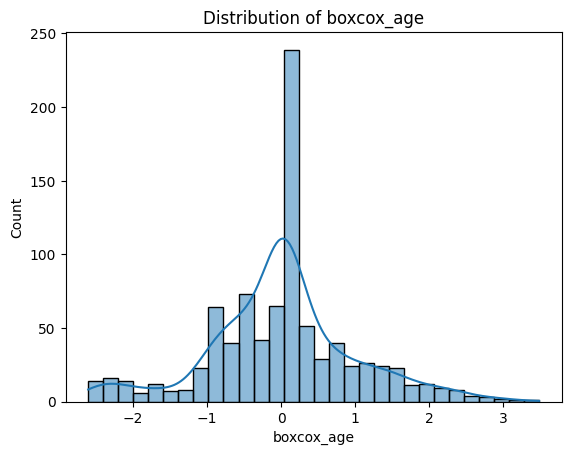

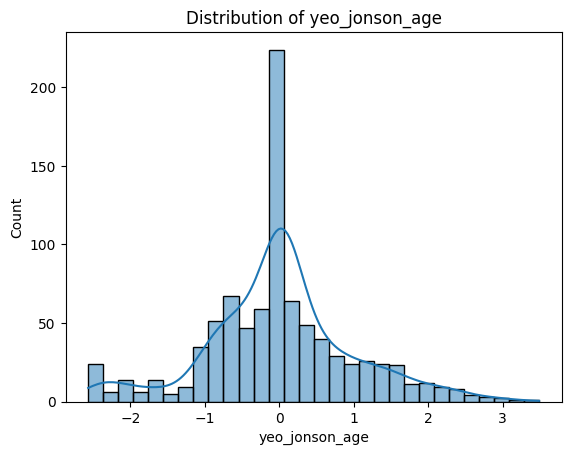

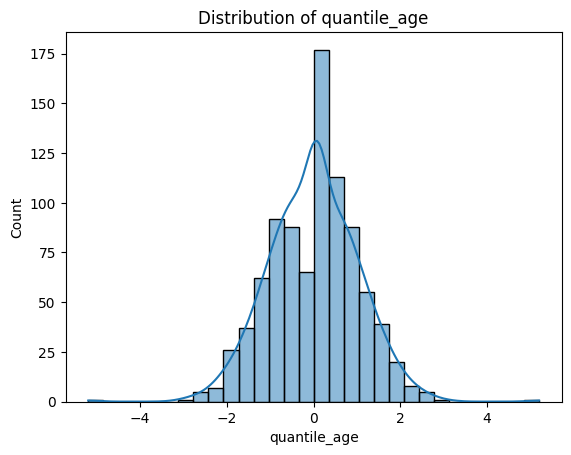

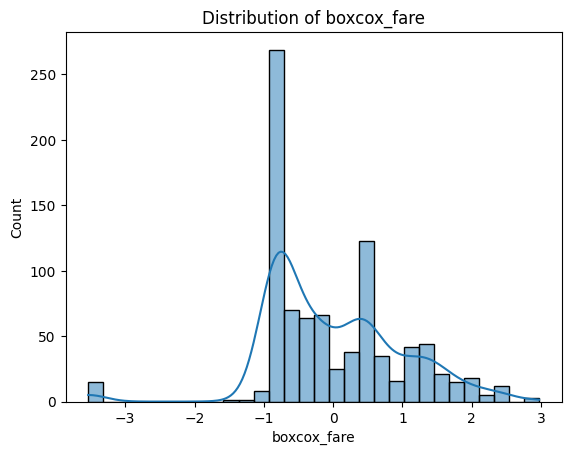

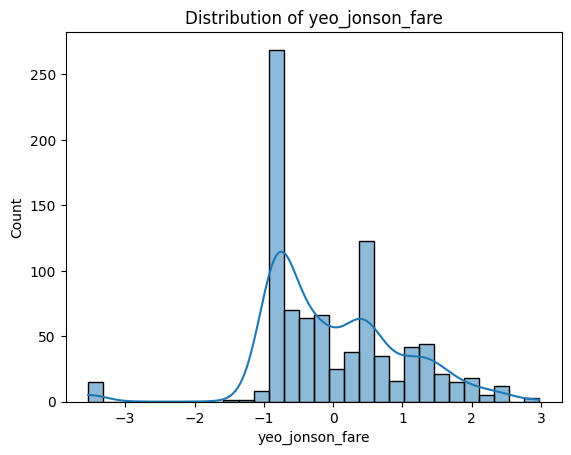

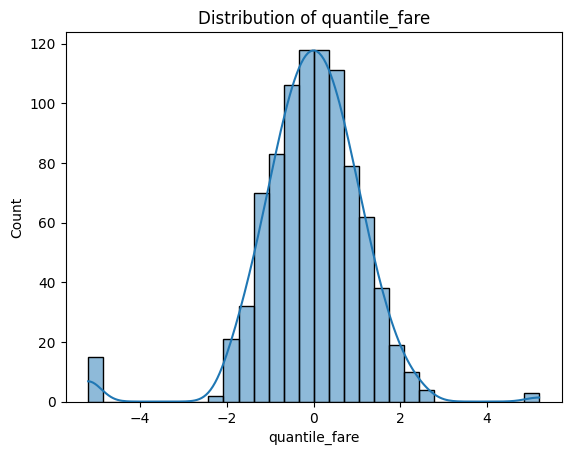

In [43]:
# show all the columns
for col in df.columns:
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

### Standard Scaling ka Pakistani Andaaz 🇵🇰

Standard Scaling ek zabardast technique hai jo data preprocessing mein use hoti hai. Iska kaam hai data ko scale karna taake har feature ka mean 0 aur standard deviation 1 ho. Yeh technique un scenarios mein kaam aati hai jahan features ka scale alag-alag hota hai aur humein unhe ek standard scale pe lana hota hai. 📏

#### Kya Hota Hai Standard Scaling?
Socho tum ek Pakistani cricket team ke players ke stats analyze kar rahe ho:
- **Feature 1**: Runs scored (e.g., 0-10,000)
- **Feature 2**: Batting average (e.g., 0-100)

Agar yeh features scale na kiye gaye, toh "Runs scored" feature dominate karega kyunke iska range bara hai. Standard Scaling ke baad dono features ka mean 0 aur standard deviation 1 ho jata hai, aur dono equally important ban jaate hain. ⚖️

#### Formula:
Standard Scaling ka formula hai:  
**xi' = (xi - μ) / σ**  
Jahan:
- **xi** ek feature ki value hai.
- **μ** us feature ka mean hai.
- **σ** us feature ka standard deviation hai.

#### Benefits of Standard Scaling:
- 🚀 Machine learning models ki convergence fast hoti hai.
- 📈 Accuracy improve hoti hai kyunke saare features ek standard scale pe hote hain.
- 🛠️ Gradient-based algorithms (jaise logistic regression aur neural networks) ke liye yeh zaroori hai.

#### Kab Use Karein?
- Jab features ka scale alag-alag ho aur humein unhe ek standard scale pe lana ho.
- Jab machine learning models mein gradient-based optimization use ho raha ho.

Standard Scaling ek must-have technique hai jo tumhare data ko ek zabardast shape mein le aati hai, aur tumhare machine learning models ki performance ko improve karti hai. 💪


In [1]:
# import libraries
import pandas as pd
import numpy as np  
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler


In [9]:
# create a dictonary 
data = {
    "Age": ['21', '22', '23', '24', '25', '26', '27', '28', '29', '30'],
    "Fare": ['7.25', '71.83', '8.05', '8.46', '7.75', '8.05', '7.23', '7.25', '7.75', '8.05'],
    "Height": ['5.5', '6.0', '5.8', '5.7', '5.9', '6.1', '5.6', '5.4', '5.3', '5.2'],
    "Weight": ['150', '160', '170', '180', '190', '200', '210', '220', '230', '240']
}

# convert the dictionary to a dataframe
df = pd.DataFrame(data)

# import Scaler
stand_scaler = StandardScaler()

# fit and transform the data
scaled_df = stand_scaler.fit_transform(df)

scaled_df = pd.DataFrame(scaeld_df, columns=df.columns)

scaled_df

,Age,Fare,Height,Weight
0,-1.566699,-0.359792,-0.522233,-1.566699
1,-1.218544,2.999373,1.218544,-1.218544
2,-0.870388,-0.318179,0.522233,-0.870388
3,-0.522233,-0.296853,0.174078,-0.522233
4,-0.174078,-0.333784,0.870388,-0.174078
5,0.174078,-0.318179,1.566699,0.174078
6,0.522233,-0.360832,-0.174078,0.522233
7,0.870388,-0.359792,-0.870388,0.870388
8,1.218544,-0.333784,-1.218544,1.218544
9,1.566699,-0.318179,-1.566699,1.566699


# Min-Max Scaling 🇵🇰
- Min-Max Scaling aik normalization technique hai jo data ko ek fixed range mein scale karta hai, aam tor par [0, 1]. Iska maqsad hai ke data ke features ko ek standard scale pe le aana taake koi feature doosre feature ko dominate na kare. 📊
  

In [13]:
data = { 
    "Marks": [50, 60, 70, 80, 90],
    "Height": [5.5, 6.0, 5.8, 5.7, 5.9],
    "Weight": [150, 160, 170, 180, 190],
    "Age": [21, 22, 23, 24, 25]

}

# convert the dictionary to a dataframe
df = pd.DataFrame(data)

# import Scaler
minmax_scaler = MinMaxScaler()

# fit and transform the data
scaled_df = minmax_scaler.fit_transform(df)

# convert the scaled data to a dataframe
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df

,Marks,Height,Weight,Age
0,0.00,0.0,0.00,0.00
1,0.25,1.0,0.25,0.25
2,0.50,0.6,0.50,0.50
3,0.75,0.4,0.75,0.75
4,1.00,0.8,1.00,1.00


# Max ABS Scaling 🇵🇰
- Max ABS Scaling aik normalization technique hai jo data ko scale karta hai lekin ismein negative values ko bhi consider kiya jata hai. Yeh technique un scenarios mein kaam aati hai jahan data mein negative aur positive values dono hoti hain. Iska maqsad hai ke data ke features ko ek standard scale pe le aana taake koi feature doosre feature ko dominate na kare. 📊

In [14]:
data = {
    "Marks": [50, 60, 70, 80, 90],
    "Height": [5.5, 6.0, 5.8, 5.7, 5.9],
    "Weight": [150, 160, 170, 180, 190],
    "Age": [21, 22, 23, 24, 25]

}

# convert the dictionary to a dataframe
df = pd.DataFrame(data)

# import Scaler
maxabs_scaler = MaxAbsScaler()
# fit and transform the data
scaled_df = maxabs_scaler.fit_transform(df)
# convert the scaled data to a dataframe
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df

,Marks,Height,Weight,Age
0,0.555556,0.916667,0.789474,0.84
1,0.666667,1.000000,0.842105,0.88
2,0.777778,0.966667,0.894737,0.92
3,0.888889,0.950000,0.947368,0.96
4,1.000000,0.983333,1.000000,1.00
